In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f_x = lambda x: (x**3)-4*(x**2)+6  

f(x) = $x^{3}$ - 4$x^{2}$ + 6

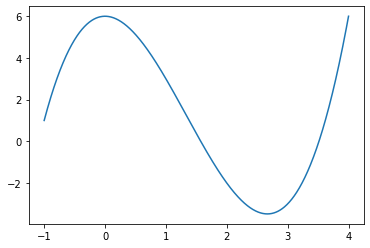

In [3]:
x = np.linspace(-1,4,1000)

#Plot the curve
plt.plot(x, f_x(x))
plt.show()

In [4]:
f_x_derivative = lambda x: 3*(x**2)-8*x

Derivative of f(x) : f'(x) = 3$x^{2}$ - 8x.<br>
Let's write functions to plot gradient descent and also calulate minimum using gradient descent algorithm.We will be passing x_start(starting value of x), iterations, learning rate as parameters.

In [5]:
def plot_gradient(x, y, x_vis, y_vis):
    plt.subplot(1,2,2)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x, f_x(x), c = "r")
    plt.title("Gradient Descent")
    plt.show()

    plt.subplot(1,2,1)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x,f_x(x), c = "r")
    plt.xlim([2.0,3.0])
    plt.title("Zoomed in Figure")
    plt.show()
    
def gradient_iteration(x_start, iterations, learning_rate):
    
    # These x and y value lists will be used later for visualisation.
    x_grad = [x_start]
    y_grad = [f_x(x_start)]
    # Keep looping until number of iterations
    for i in range(iterations):
        
        # Get the Slope value from the derivative function for x_start
        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = - f_x_derivative(x_start)
        
        # calculate x_start by adding the previous value to 
        # the product of the derivative and the learning rate calculated above.
        x_start += (learning_rate * x_start_derivative)        
        
        x_grad.append(x_start)
        y_grad.append(f_x(x_start))

    print ("Local minimum occurs at: {:.2f}".format(x_start))
    print ("Number of steps: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)

Now , let's run gradient_iteration function with <br>
x_start = 0.5, iterations = 1000, learning rate = 0.05

Local minimum occurs at: 2.67
Number of steps:  1000


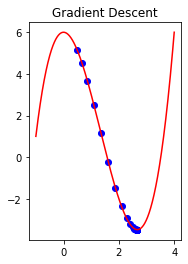

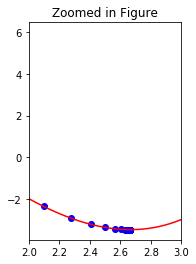

In [6]:
gradient_iteration(0.5, 1000, 0.05)

We are able to find the Local minimum at 2.67 and as we have given the number of iterations as 1000, Algorithm has taken 1000 steps. It might have reached the value 2.67 at a much earlier iteration. But since we don't know at what point will our algorithm reach the local minimum with the given learning rate, we give a high value of iteration just to be sure that we find our local minimum.<br>Let's define another function which takes precision as input instead of iterations . Since we know the dataset, we can define the level of precision that we want and stop the algorithm once we reach that level of precision.

In [7]:
def gradient_precision(x_start, precision, learning_rate):
    
    # These x and y value lists will be used later for visualisation.
    x_grad = [x_start]
    y_grad = [f_x(x_start)]

    while True:
        
        # Get the Slope value from the derivative function for x_start
        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = - f_x_derivative(x_start)
        
        # calculate x_start by adding the previous value to 
        # the product of the derivative and the learning rate calculated above.
        x_start += (learning_rate * x_start_derivative)
        
        
        x_grad.append(x_start)        
        y_grad.append(f_x(x_start))
        # Break out of the loop as soon as we meet precision.
        if abs(x_grad[len(x_grad)-1] - x_grad[len(x_grad)-2]) <= precision:
            break


    print ("Local minimum occurs at: {:.2f}".format(x_start))
    print ("Number of steps taken: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)
    

Now let's call this function with parameters <br>x_start = 0.5, precision = 0.001, learning rate = 0.01

Local minimum occurs at: 2.66
Number of steps taken:  85


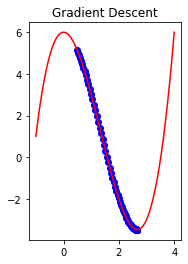

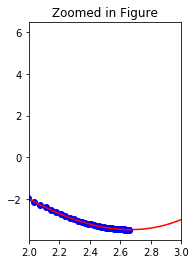

In [8]:
gradient_precision(0.5, 0.001, 0.01)

Since learning rate was lesser, which means the number of steps taken to reach local minimum was higher (85). As we can see in the graph, 85 x values plotted in blue, meaning our Algorithm was slower in finding local minimum.<br> Let's increase learning rate to 0.05 and check results.

Local minimum occurs at: 2.67
Number of steps taken:  20


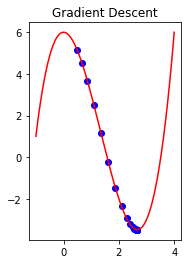

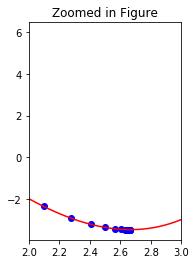

In [9]:
gradient_precision(0.5, 0.001, 0.05)

For the same precision value and x_start value, but learning rate = 0.05, we see that our Algorithm was able to find local minimum in just 20 steps. This shows that by increasing learning rate , the algorithm reaches local minimum faster. Let's increase the learning rate to 0.14 and note results again.

Local minimum occurs at: 2.67
Number of steps taken:  6


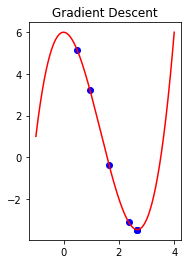

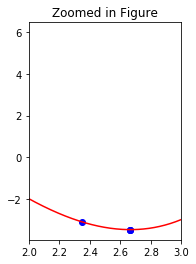

In [10]:
gradient_precision(0.5, 0.001, 0.14)

By increasing the learning rate to 0.14, the  Algorithm was able to find local minimum in just 6 steps. Lets increase it by 0.01 to see if the trend continues.

Local minimum occurs at: 2.67
Number of steps taken:  8


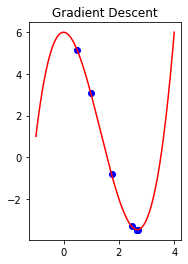

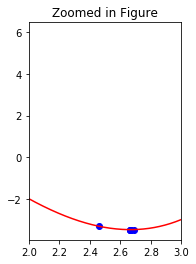

In [11]:
gradient_precision(0.5, 0.001, 0.15)

The number of steps taken increased this time! . Looks like learning rate = 0.14 is the sweet spot for precision = 0.001.